### Practical 4

4A. Generate 61 points for𝐭𝐚𝐫𝐠𝐞𝐭 = 𝐬𝐢𝐧 𝐱 , 𝐰𝐡𝐞𝐫𝐞 𝐱 ∈ [−𝟑, 𝟑]. Use this dataset to train
two layer neural networks using gradient descent learning algorithm. Draw two curves with
different colours, for target and output(y) of the trained neural network.


ReLU introduces non-linearity to the model. Neural networks aim to learn complex relationships in data, and introducing non-linearity allows the model to capture more intricate patterns. The sine function is non-linear, and using ReLU helps the neural network approximate non-linear functions effectively.

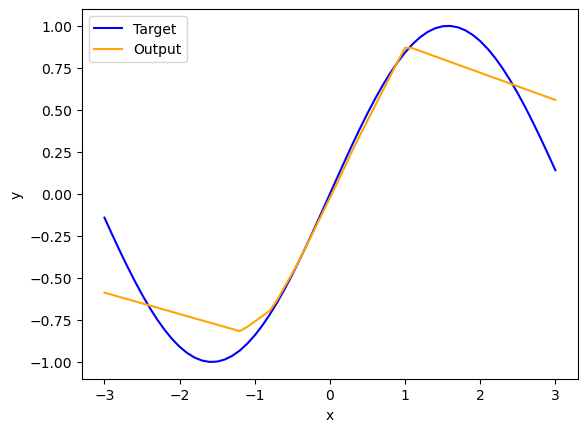

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
x = np.linspace(-3, 3, 61)
y_target = np.sin(x)

# Convert to PyTorch tensors
x_tensor = torch.FloatTensor(x.reshape(-1, 1))
y_target_tensor = torch.FloatTensor(y_target.reshape(-1, 1))

# Define neural network model
class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = TwoLayerNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_output = model(x_tensor)
    
    # Compute the loss
    loss = criterion(y_output, y_target_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Convert predictions to NumPy array
y_output = y_output.detach().numpy()

# Plot the target and output curves
plt.plot(x, y_target, label='Target', color='blue')
plt.plot(x, y_output, label='Output', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


4B.Use MNIST dataset to train neural networks using gradient descent learning
algorithm.Experiments with various Architectures of neural networks, and with different
activation functions for hidden and output layers.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Set random seed for reproducibility
torch.manual_seed(42)

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define neural network model
class CustomNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_function_hidden, activation_function_output):
        super(CustomNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.activation_hidden = activation_function_hidden
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.activation_output = activation_function_output

    def forward(self, x):
        x = self.activation_hidden(self.layer1(x))
        x = self.activation_output(self.layer2(x))
        return x

# Define training function
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 28 * 28)  # Flatten input for fully connected layer
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')

# Define testing function
def test_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(-1, 28 * 28)  # Flatten input for fully connected layer
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Experiment with different architectures and activation functions
input_size = 28 * 28
output_size = 10  # Number of classes in MNIST
num_epochs = 5

# Example 1: Single hidden layer with ReLU activation
model1 = CustomNN(input_size, hidden_size=128, output_size=output_size, 
                  activation_function_hidden=nn.ReLU(), activation_function_output=nn.LogSoftmax(dim=1))

# Example 2: Multiple hidden layers with Sigmoid activation
model2 = CustomNN(input_size, hidden_size=256, output_size=output_size,
                  activation_function_hidden=nn.Sigmoid(), activation_function_output=nn.LogSoftmax(dim=1))

# Example 3: Different number of hidden units and Tanh activation
model3 = CustomNN(input_size, hidden_size=64, output_size=output_size,
                  activation_function_hidden=nn.Tanh(), activation_function_output=nn.LogSoftmax(dim=1))

# Example 4: Different architectures and activation functions
model4 = nn.Sequential(
    nn.Linear(input_size, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.Sigmoid(),
    nn.Linear(128, output_size),
    nn.LogSoftmax(dim=1)
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)
optimizer4 = optim.SGD(model4.parameters(), lr=0.01)

# Train and test models
train_model(model1, criterion, optimizer1, num_epochs=num_epochs)
test_model(model1)

train_model(model2, criterion, optimizer2, num_epochs=num_epochs)
test_model(model2)

train_model(model3, criterion, optimizer3, num_epochs=num_epochs)
test_model(model3)

train_model(model4, criterion, optimizer4, num_epochs=num_epochs)
test_model(model4)


100%|██████████| 9912422/9912422 [00:01<00:00, 8323010.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29792349.69it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4119228.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10714583.11it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5, Loss: 0.7497317834036437
Epoch 2/5, Loss: 0.3667101680215742
Epoch 3/5, Loss: 0.32107355160467915
Epoch 4/5, Loss: 0.29359343129275706
Epoch 5/5, Loss: 0.2722507642546315
Test Accuracy: 92.42%
Epoch 1/5, Loss: 1.7181528407627586
Epoch 2/5, Loss: 0.8291458538028477
Epoch 3/5, Loss: 0.572844506009047
Epoch 4/5, Loss: 0.47631754761120915
Epoch 5/5, Loss: 0.4255541225772168
Test Accuracy: 89.56%
Epoch 1/5, Loss: 0.8405310012765531
Epoch 2/5, Loss: 0.39622247727440874
Epoch 3/5, Loss: 0.32895414814003493
Epoch 4/5, Loss: 0.29482868552875163
Epoch 5/5, Loss: 0.2715358536507783
Test Accuracy: 92.67%
Epoch 1/5, Loss: 2.056302893517622
Epoch 2/5, Loss: 1.056905282141049
Epoch 3/5, Loss: 0.6157569128757855
Epoch 4/5, Loss: 0.47249099817166706
Epoch 5/5, Loss: 0.4078607051643227
Test Accuracy: 89.71%
